# 6. 차원 축소
# [01] 차원 축소(Dimension Reduction) 개요

차원 축소
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원이 데이터 세트를 생성하는 것
- 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터 해석이 가능
- 차원 축소를 통해 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하기

차원 축소의 종류
- 피처 선택 (feature selection)(특정 선택)
 - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거
 - 데이터의 특징을 잘 나타내는 피처만 선택
- 피처 추출 (feature extraction)
 - 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것
 - 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것, 기존의 피처와는 다른 값
 - 피처를 함축적으로 더 잘 설명할 수 있는 또 다르 공간으로 매핑해 추출하는 것 (함축적인 요약 특성을 추출)

 차원 축소 알고리즘
 - PCA, SVD, NMF

# [02] PCA (Principle Component Analysis)
### [PCA 개요]

PCA (Principle Component Analysis) : 주성분 분석
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소
- 이것이 PCA의 주성분 -> 분산이 데이터의 특성을 가장 잘 나타냄

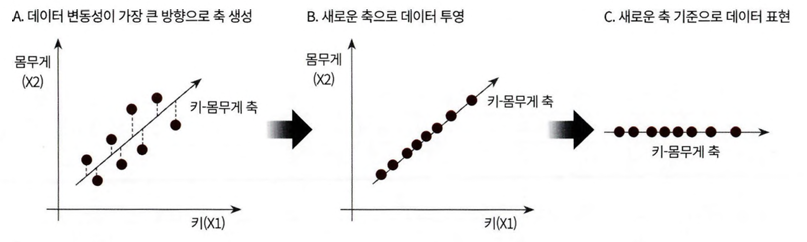


 - 첫 번째 축 : 가장 큰 데이터 변동성(Variance)를 기반으로 생성
 - 두 번째 축 : 첫 번째 벡터 축에 직각이 되는 벡터(직교 벡터)
 - 세 번째 축 : 두 번째 축의 직교 벡터

 - => 원본 데이터의 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성의 대부분을 설명할 수 있음

[ 선형대수 관점에서 보는 PCA ]

: 입력 데이터의 공분산 행렬을 고유값 분해 -> 고유벡터에 입력 데이터를 선형 변환하는 것

- 고유벡터
 - PCA 주성분 벡터
 - 입력 데이터의 분산이 큰 방향
 - 고윳값(eigenvalue) : 고유벡터의 크기, 입력 데이터의 분산
- 선형변환
 - 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하기
- 공분산
 - 두 변수간의 변동
 - 공분산 행렬 : 여러 변수와 관련된 공분산을 포함하는 정방향 행렬
 - 공분산 행렬 C
  - 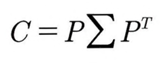
  - 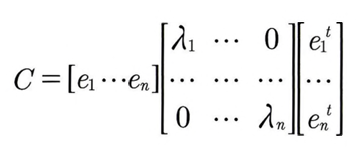
  
  - 공분산 C = 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬

- => 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해가 가능함
- => 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA

[ PCA 과정 ]
- 1. 입력 데이터 세트의 공분산 행렬 생성하기
- 2. 공분산 행렬의 고유벡터와 고유값을 계산
- 3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼) 고유벡터를 추출
- 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

[ 붓꽃 데이터 세트 이용해 PCA 진행 ]
- 4개의 속성 (sepal length, sepal width, petal length, petal width) 을 2개의 PCA 차원으로 압축
- 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라지는지 확인하기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


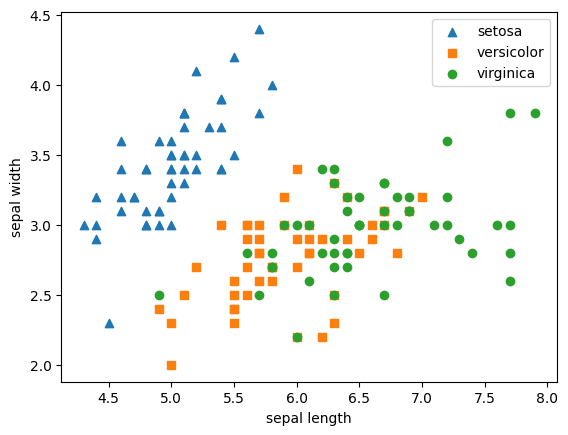

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virgincia는 2, 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Setosa 품종
 - sepal width 가 3.0보다 큼
 - sepal length 가 6.0 이하인 곳에서 일정하게 분포
- Versicolor, Virginica
 - sepal width 와 sepal length 조건만으로는 분류가 어려운 복잡한 조건

개별 속성 스케일링
- 각 속성값을 동일한 스케일로 변환하기
- 사이킷런의 StandardScaler 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환시키기

In [4]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값들을 StandardScaler로 표준화
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


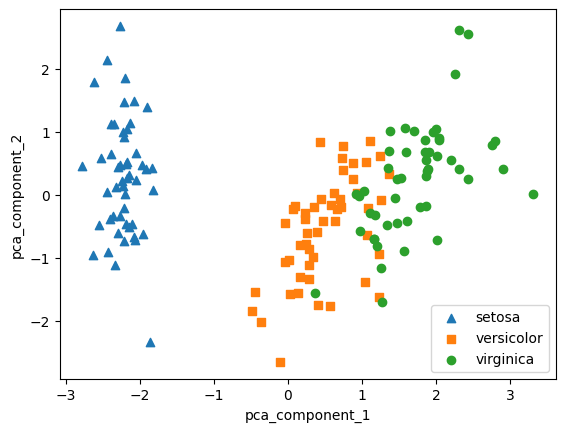

In [8]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virgincia는 2, 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 첫 번째 새로운 축인 pca_compoenet_1 이 원본 데이터의 변동성을 잘 반영함
 - Setosa 품종 : pca_component_1 축을 기반으로 명확하게 구분 가능
 - Versicolor, Virginica : pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재, 구분 가능

In [11]:
# PCA Component 별로 원본 데이터의 변동성을 얼마나 잘 반영하는지
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1 : 전체 변동성의 약 72.9%를 차지
- 두 번째 PCA 변환 요소인 pca_component_2 : 전체 변동성의 약 22.8%를 차지

[ 원본 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용 후 결과 비교 ]

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 원본 데이터 랜덤포레스트 적용
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [15]:
# PCA 변환 데이터 세트에 랜덤포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


-> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음

### [ 신용카드 고객 데이터 세트 에 PCA 적용 ]

In [23]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 30,000개의 레코드와 24개의 속성
- 'default payment next month'
 - Target 값
 - '다음달 연체 여부'를 의미
 - '연체'일 경우 1, '정상납부'는 0
 - 'default'로 칼럼명 변경

In [24]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

In [26]:
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

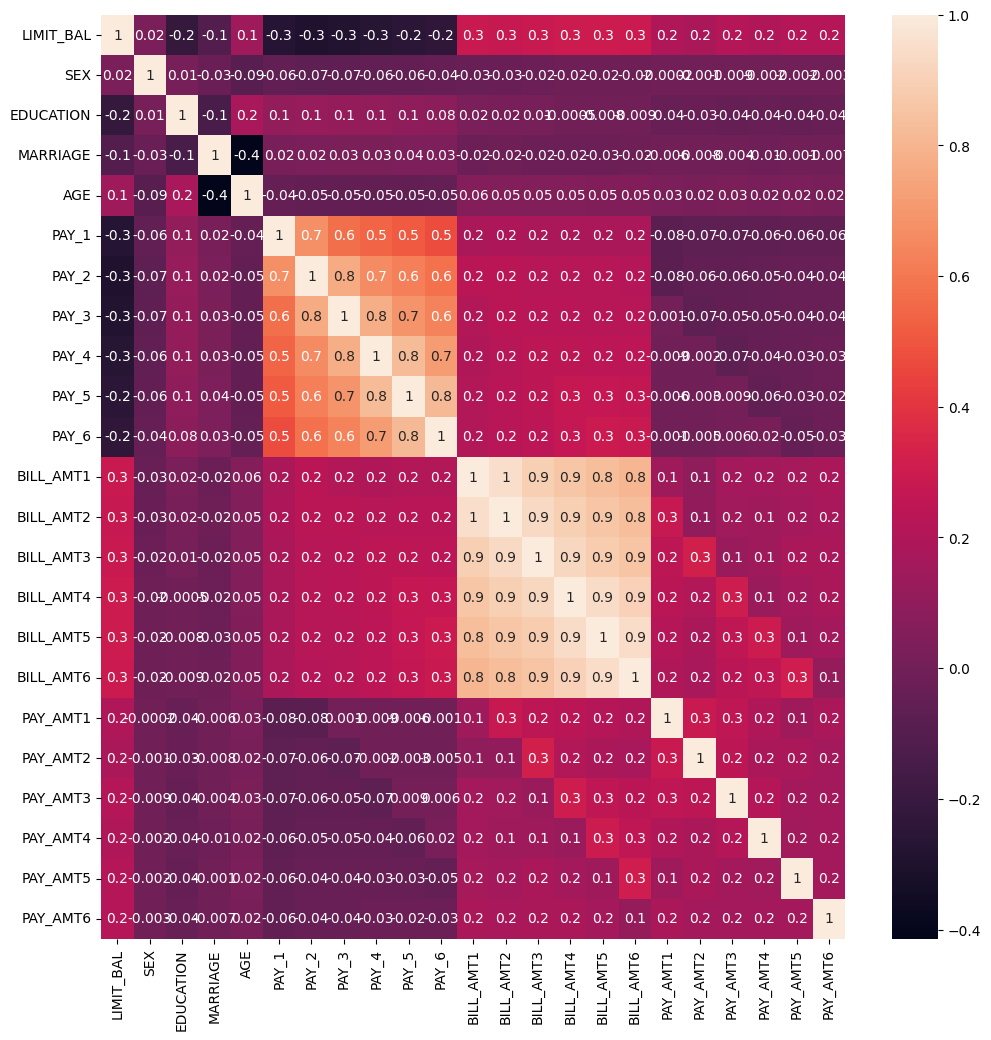

In [27]:
# 각 속성간 상관도
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.1g')

-  BILL_AMT1 〜 BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
-  PAY_1 〜 PAY_6까지의 속성 역시 상관도가 높음

- -> 이 BILL_AMT1 〜 BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explainedjvariance_ratio_ 속성으로 알아보기

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
- 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교

In [29]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


- 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.70%

6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측을 적용

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7913 0.7972 0.802 ]
PCA 변환 데이터 셋 평균 정확도:0.7968


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1〜2% 정도의 예측 성능 저하만 발생

# [03] LDA (Linear Disciminat Analysis)
## [LDA 개요]

- LDA (Linear Disciminat Analysis) : 선형 판별 분석법
 - PCA 와 유사
 - LDA 는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
 - 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter) 방식
 - 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소
 - 클래스 간분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

[ LDA 과정 ]
- 1. 클래스 내부와 클래스 간 분산 행렬 구하기
 -  이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구하기
- 2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb 라 하면 다을 식으로 두 행렬을 고유 벡터로 분해 가능
 - 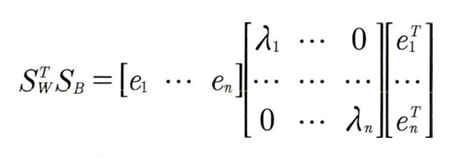
- 3. 고유값이 가장 큰 순으로 K개 추출
- 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

### [붓꽃 데이터 세트에 LDA 적용하기]

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

- LDA는 PCA와 다르게 비지도학습이 아닌 지도학습
- 변환 시 클래스의 결정값이 필요

In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # LCA는 지도학습이라서 결정값도 fit안에 넣어야 함
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


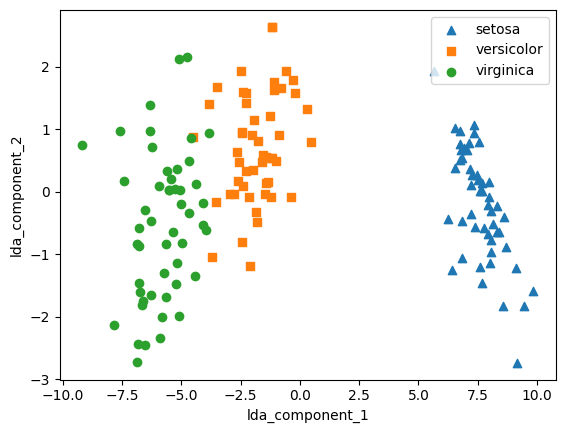

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# [04] SVD (SIngular Value Decomposition)
## [SVD 개요]

- SVD (SIngular Value Decomposition) : 특이값 분해
 - 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
 - 일반적으로 m x n 크기의 행렬을 분해
 - 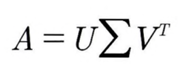
 - 특이벡터 : 행렬 U와 V에 속한 벡터, 모든 특이벡터는 서로 직교하는 성질
 - $\sum$ : 대각행렬, 행렬의 대각에 위치한 값은 0이 아니고 나머지는 모두 0
 - $\sum$ 이 위치한 0이 아닌 값 : 행렬 A의 특이값

- 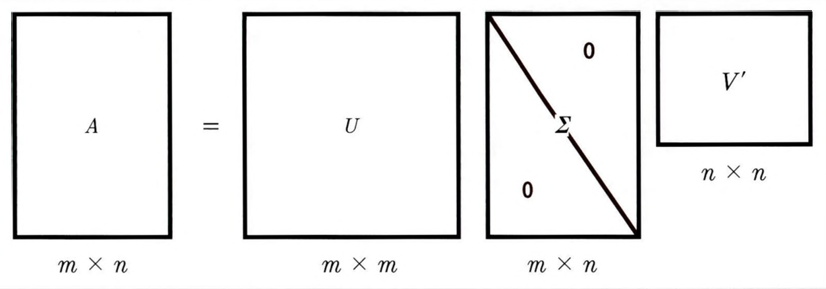

- 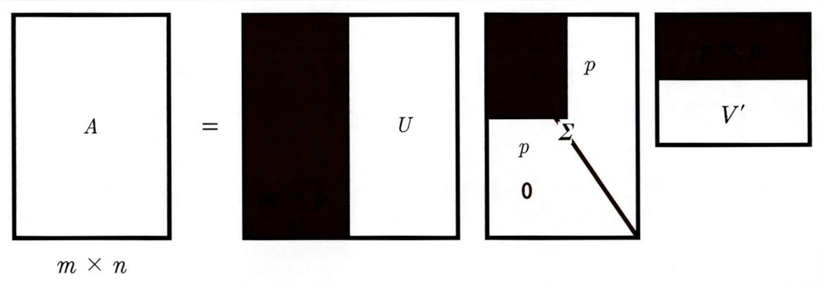

In [35]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [36]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [37]:
# Sigma를 다시 0 을 포함한 대칭행렬로 변환한 후 U, Sigma, Vt를 내적하여 원본 행렬로 복원
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [38]:
# 로우 간 의존성이 있는 경우 어떻게 Sigma값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [40]:
# U 행렬의 경우는 Sigma의 앞의 2개의 요소만 0이 아니므로 두 개의 열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 두개의 행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [41]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### [사이킷런 TruncatedSVD 클래스를 이용한 변환]

Text(0, 0.5, 'TruncatedSVD Component 2')

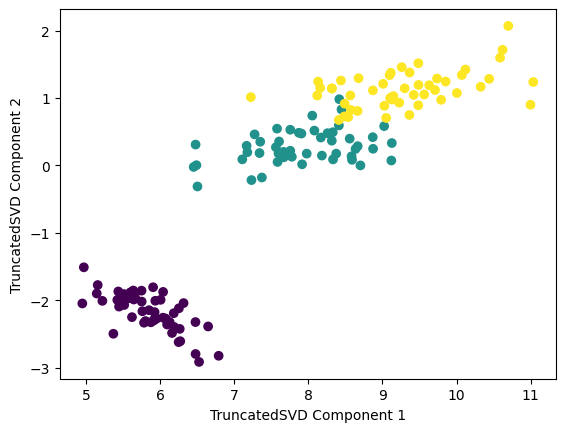

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

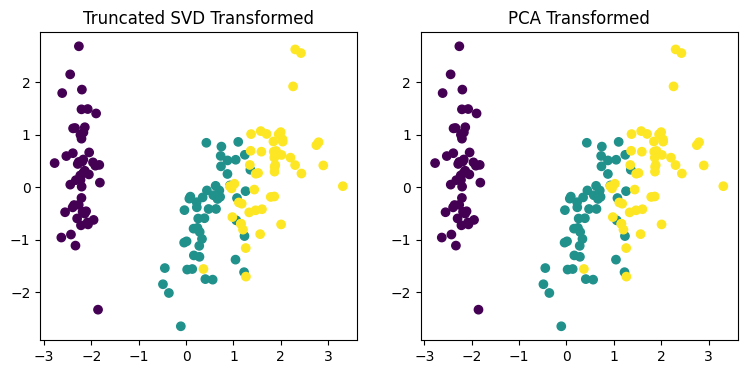

In [43]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [44]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3390953525955403e-15
-7.632783294297951e-17


## [05] NMF (Non-Negative Matrix Factorization)
### [NMF 개요]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

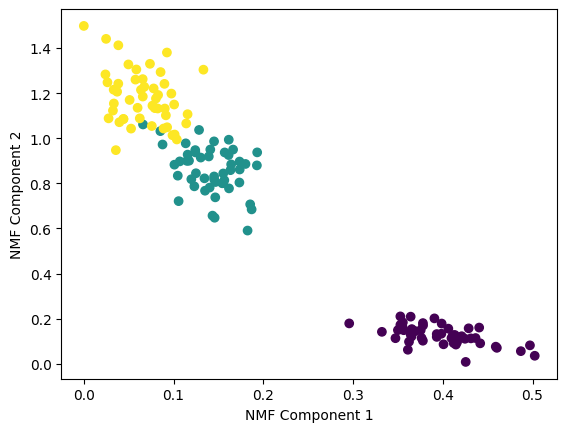

In [45]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')